In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("supermarket_sales.csv")

# Data processing

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Total sales in Branch

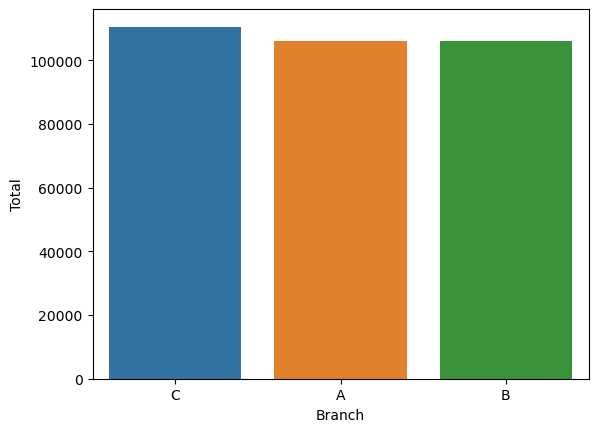

In [7]:
branch_sales =df.groupby(['Branch'],as_index =False)['Total'].sum().sort_values(by="Total",ascending =False)
sns.barplot(data=branch_sales,x="Branch",y ="Total")
plt.show()

#  Branch  A   Analysis

In [8]:
df_a =df[df["Branch"]=="A"]


In [9]:
df_a.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8


# sales in product type

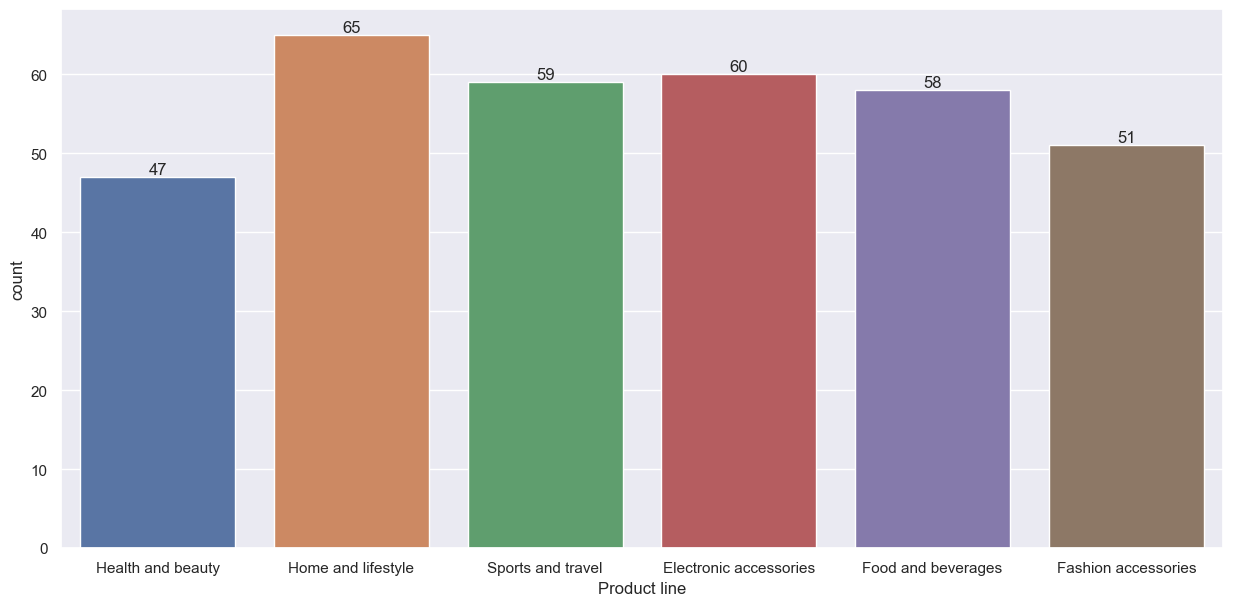

In [20]:
var = sns.countplot(data=df_a,x="Product line")
sns.set(rc={"figure.figsize" :(15,7)})
for bar in var.containers:
    var.bar_label(bar)

# Product type Quantity Sales 

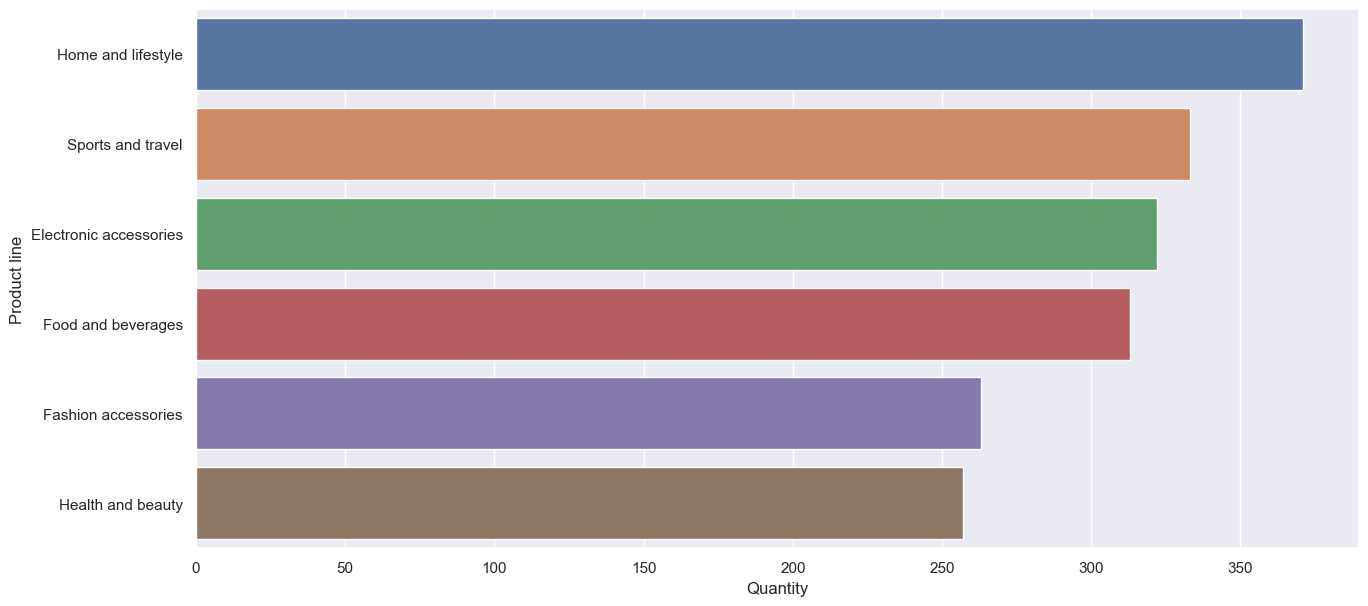

In [11]:
product_qty =df_a.groupby(['Product line'],as_index =False)['Quantity'].sum().sort_values(by="Quantity",ascending =False)
sns.barplot(data=product_qty,x="Quantity",y ="Product line")
plt.show()

# Product Total Sales

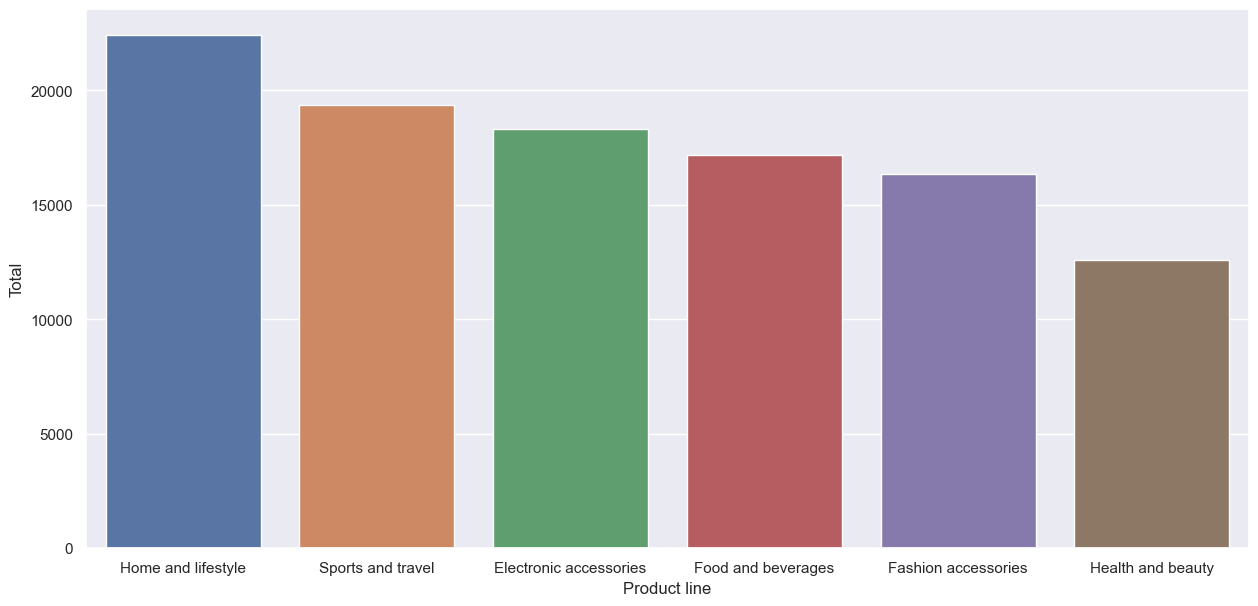

In [12]:
product_total =df_a.groupby(['Product line'],as_index =False)['Total'].sum().sort_values(by="Total",ascending =False)
sns.barplot(data=product_total,x="Product line",y ="Total")
plt.show()

# Gender sales

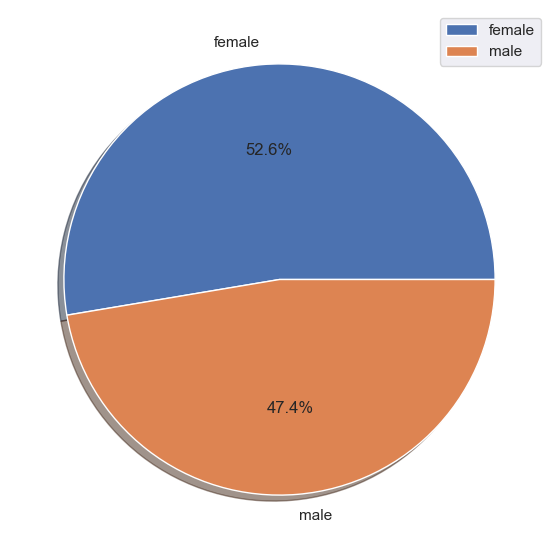

In [13]:
mylabels =["female","male"]
plt.pie(x=df_a['Gender'].value_counts(),labels=mylabels,shadow=True,autopct="%0.1f%%")
plt.legend()
plt.show()

# Payment Type

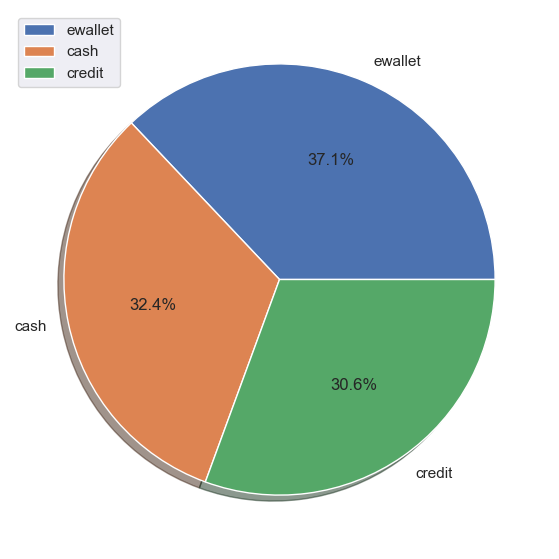

In [14]:
mylabels=['ewallet',"cash","credit"]
plt.pie(x=df_a['Payment'].value_counts(),shadow=True,autopct="%0.1f%%",labels=mylabels)
plt.legend()
plt.show()

# Customer Type

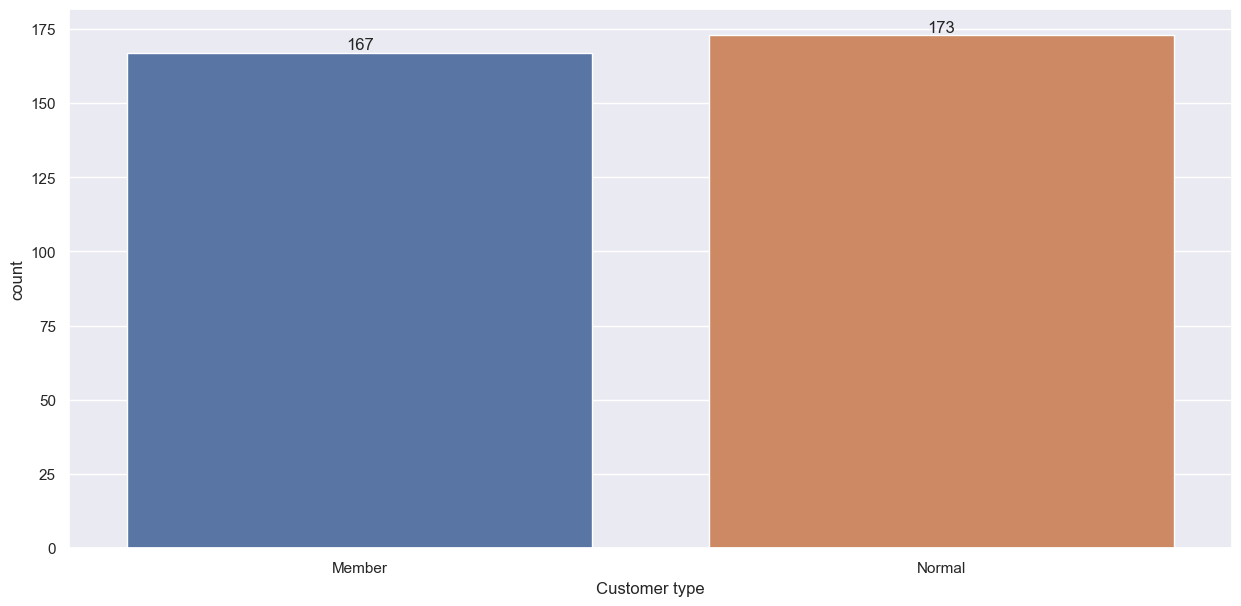

In [15]:
var = sns.countplot(data=df_a,x="Customer type")
sns.set(rc={"figure.figsize" :(10,5)})
for bar in var.containers:
    var.bar_label(bar)

# BOTH TYPE CUSTOMER (MEMBER \ NORMAL) FEMALE INTERSETED IN HOME AND LIFESTYLE ,SPORTS AND TRAVEL AND ELECTRONICS PAYMENT WITH EWELLET AND CASH 

# Branch B Analysis

In [16]:
df_b =df[df["Branch"]=="B"]

In [17]:
df_b.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2/20/2019,13:27,Credit card,164.52,4.761905,8.226,5.9
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,2/6/2019,18:07,Ewallet,57.92,4.761905,2.896,4.5
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,3/9/2019,17:03,Cash,102.04,4.761905,5.102,6.8
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,1/15/2019,16:19,Cash,562.32,4.761905,28.116,4.5
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,3/11/2019,15:30,Ewallet,80.60,4.761905,4.030,4.4


# sales in product type

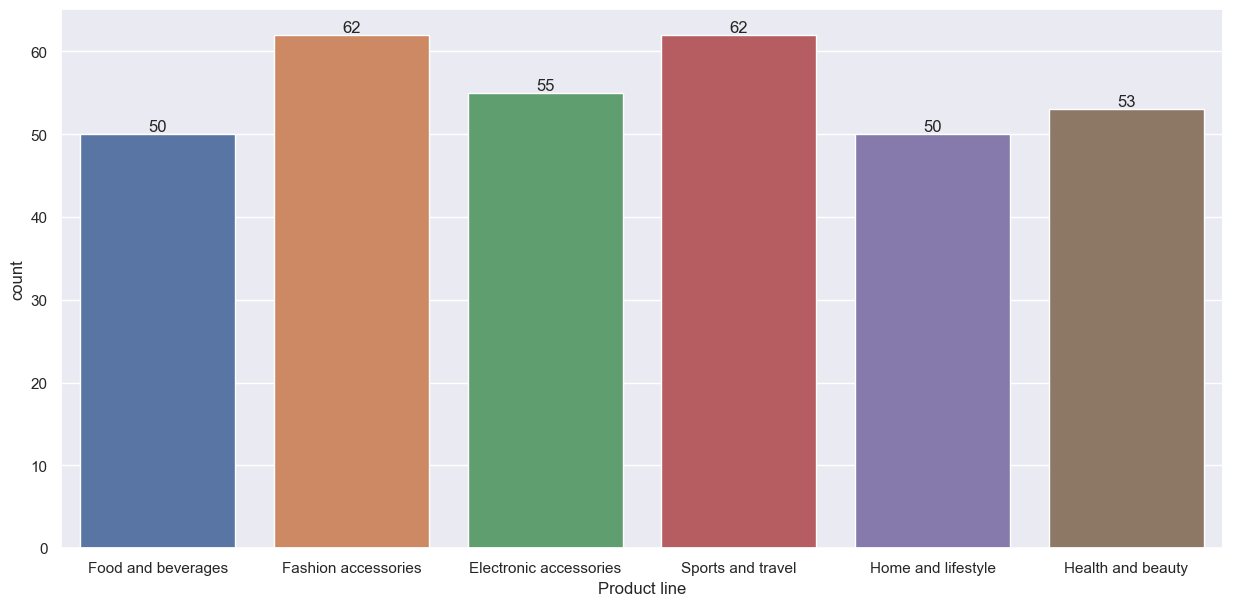

In [19]:
var1 = sns.countplot(data=df_b,x="Product line")
sns.set(rc={"figure.figsize" :(15,7)})
for bar in var1.containers:
    var1.bar_label(bar)

# Product type Quantity Sales

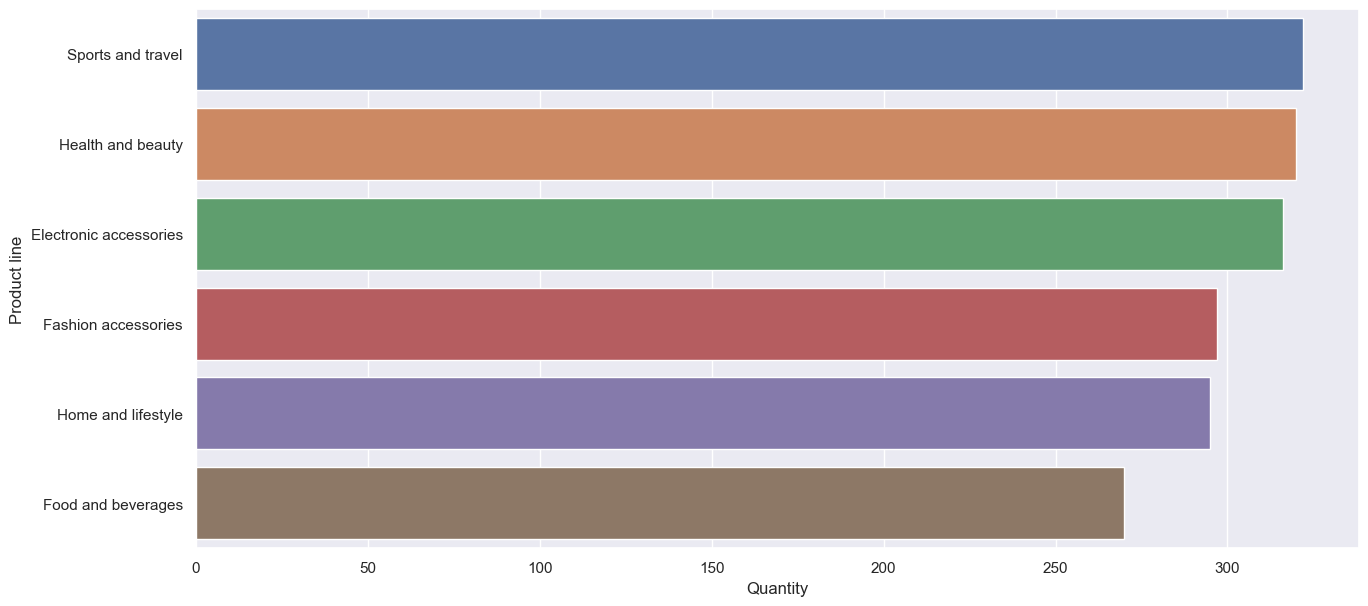

In [21]:
product_qty1 =df_b.groupby(['Product line'],as_index =False)['Quantity'].sum().sort_values(by="Quantity",ascending =False)
sns.barplot(data=product_qty1,x="Quantity",y ="Product line")
plt.show()

# Product Total Sales

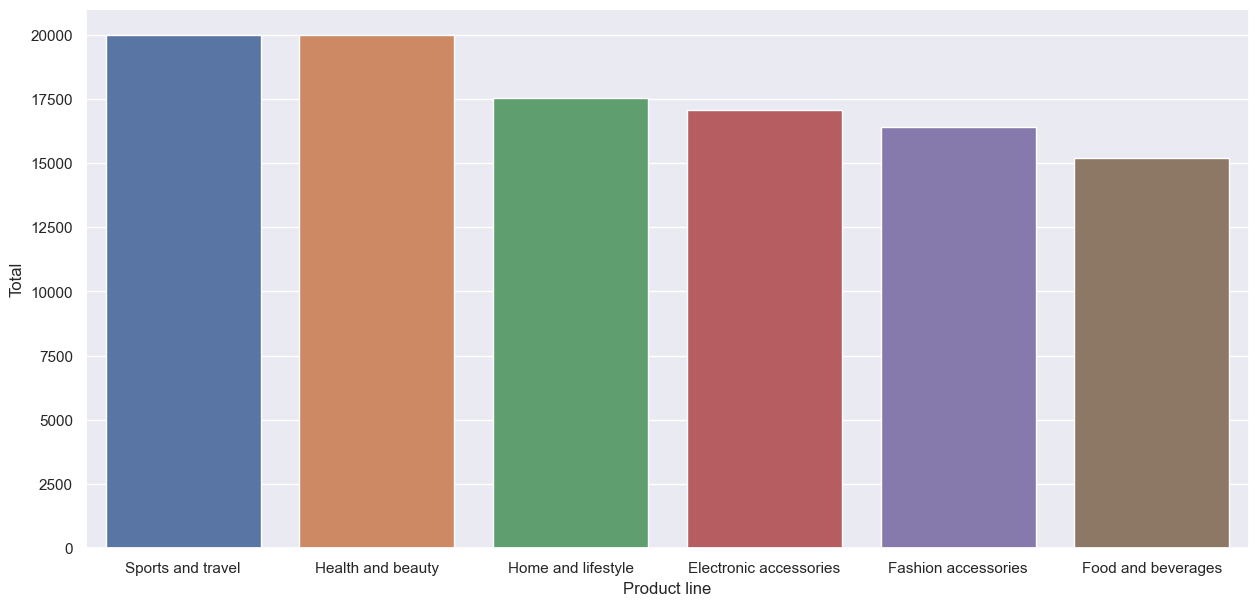

In [22]:
product_total1 =df_b.groupby(['Product line'],as_index =False)['Total'].sum().sort_values(by="Total",ascending =False)
sns.barplot(data=product_total1,x="Product line",y ="Total")
plt.show()

# Gender sales

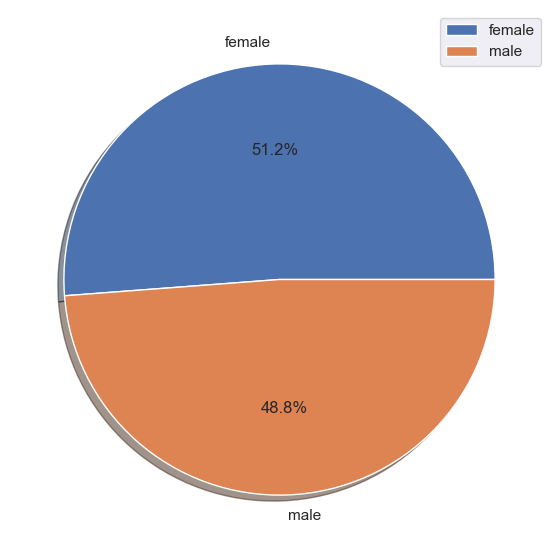

In [23]:
mylabels =["female","male"]
plt.pie(x=df_b['Gender'].value_counts(),labels=mylabels,shadow=True,autopct="%0.1f%%")
plt.legend()
plt.show()

# Payment Type

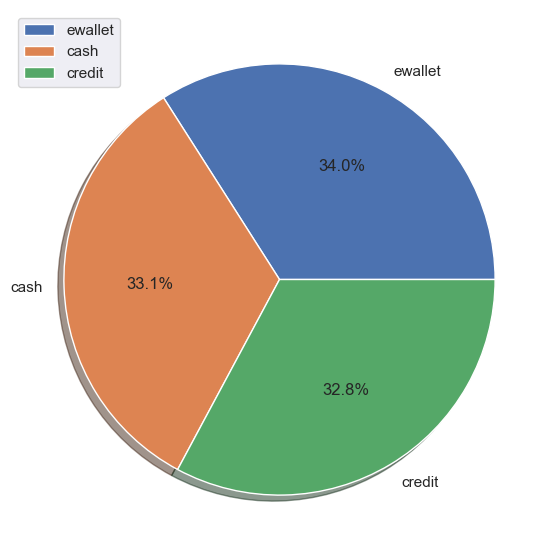

In [24]:
mylabels=['ewallet',"cash","credit"]
plt.pie(x=df_b['Payment'].value_counts(),shadow=True,autopct="%0.1f%%",labels=mylabels)
plt.legend()
plt.show()

# Customer Type

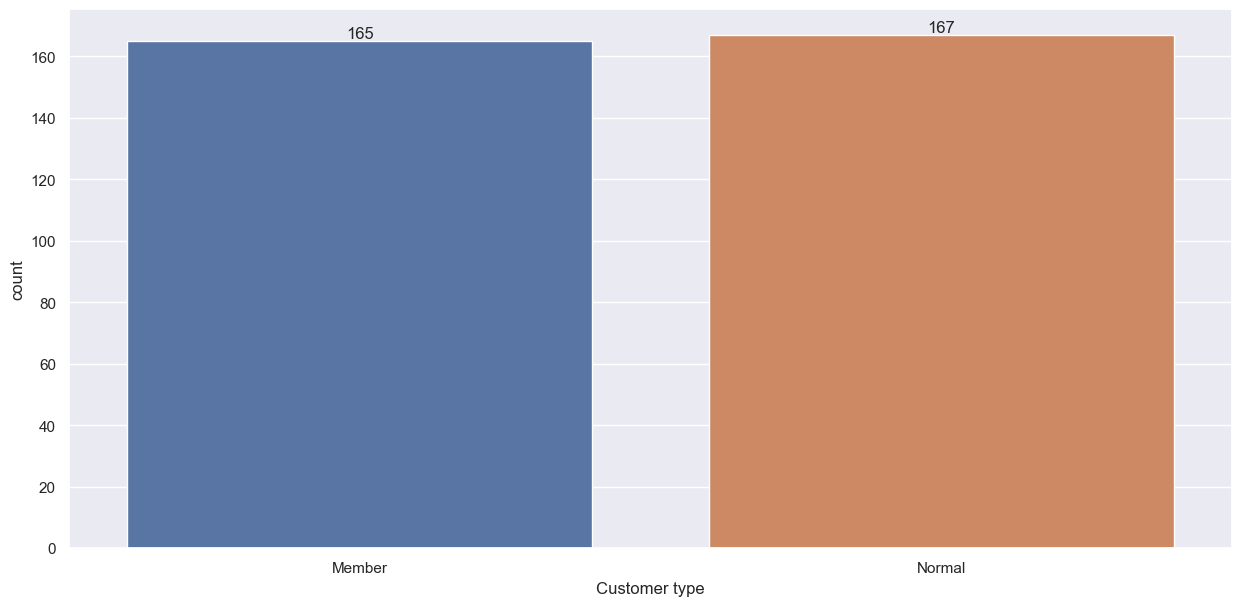

In [25]:
var = sns.countplot(data=df_b,x="Customer type")
sns.set(rc={"figure.figsize" :(10,5)})
for bar in var.containers:
    var.bar_label(bar)

# BOTH CUSTOMER TYPE (MEMBER / NORMAL ) FEMALES INTEESTED IN FASHION ACCESSORIES, SPORTS AND TRAVEL SUPPORT ALL TYPE OF PAYMENT MATHOD

# Branch C Analysis

In [27]:
df_c =df[df["Branch"]=="C"]

In [28]:
df_c.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
20,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,2/25/2019,11:24,Ewallet,430.20,4.761905,21.5100,4.8
34,183-56-6882,C,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.8840,417.5640,2/6/2019,10:42,Ewallet,397.68,4.761905,19.8840,7.5


# sales in product type

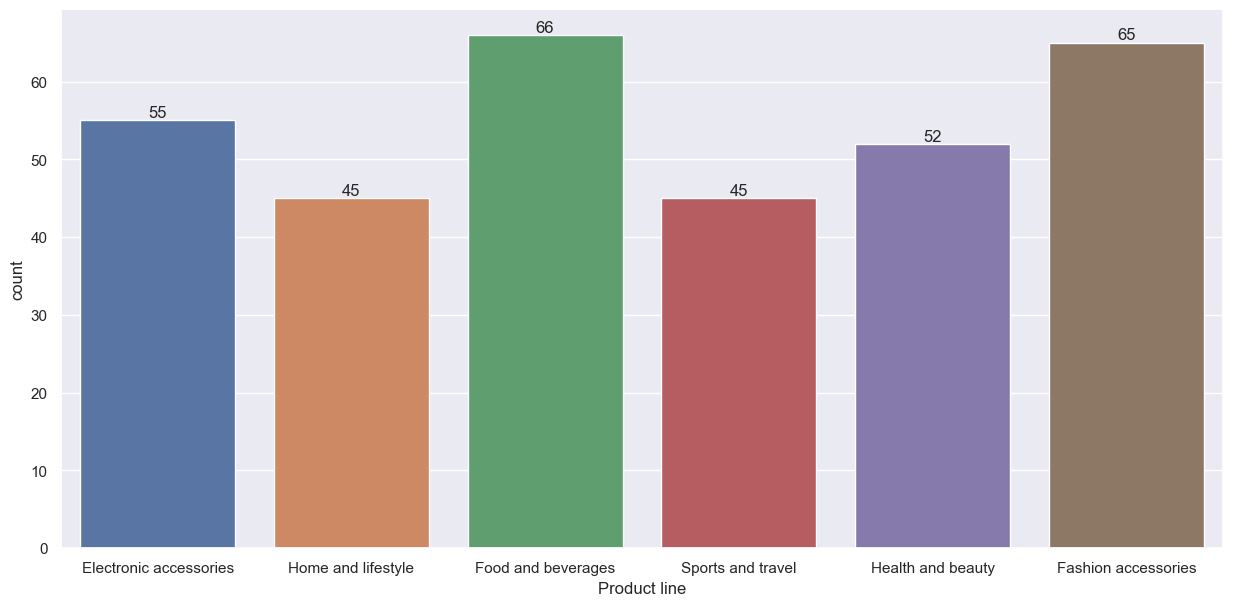

In [32]:
var2 = sns.countplot(data=df_c,x="Product line")
sns.set(rc={"figure.figsize" :(15,7)})
for bar in var2.containers:
    var2.bar_label(bar)

# Product type Quantity Sales

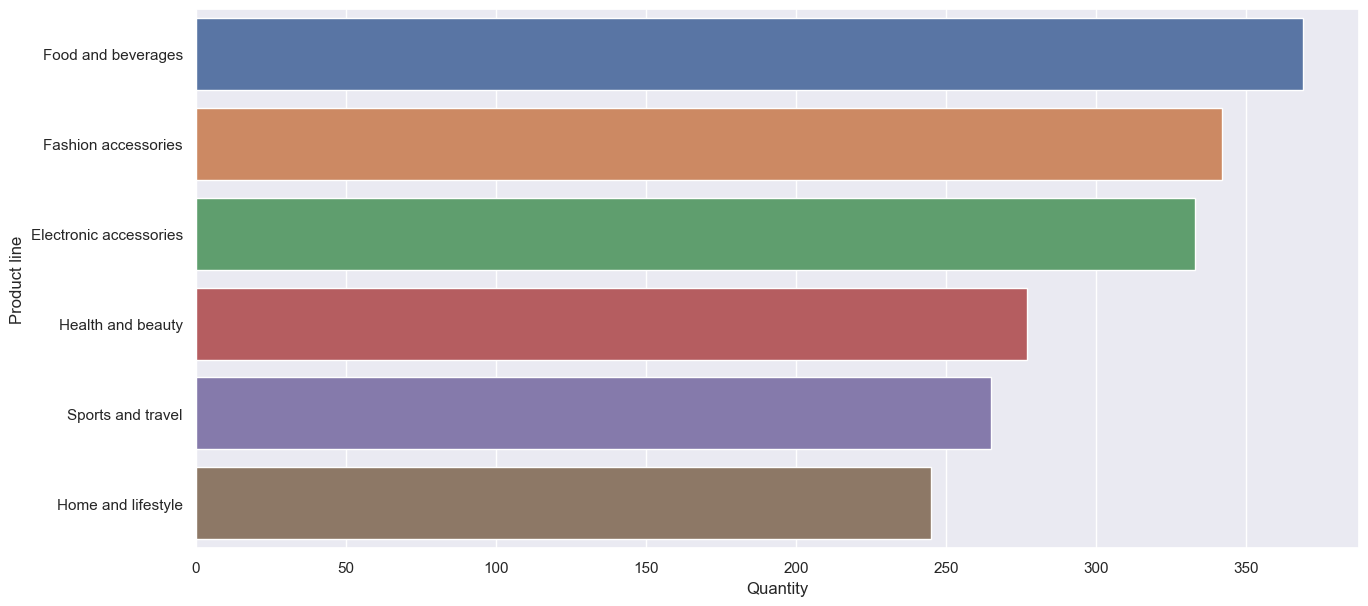

In [33]:
product_qty2 =df_c.groupby(['Product line'],as_index =False)['Quantity'].sum().sort_values(by="Quantity",ascending =False)
sns.barplot(data=product_qty2,x="Quantity",y ="Product line")
plt.show()

# Product Total Sales

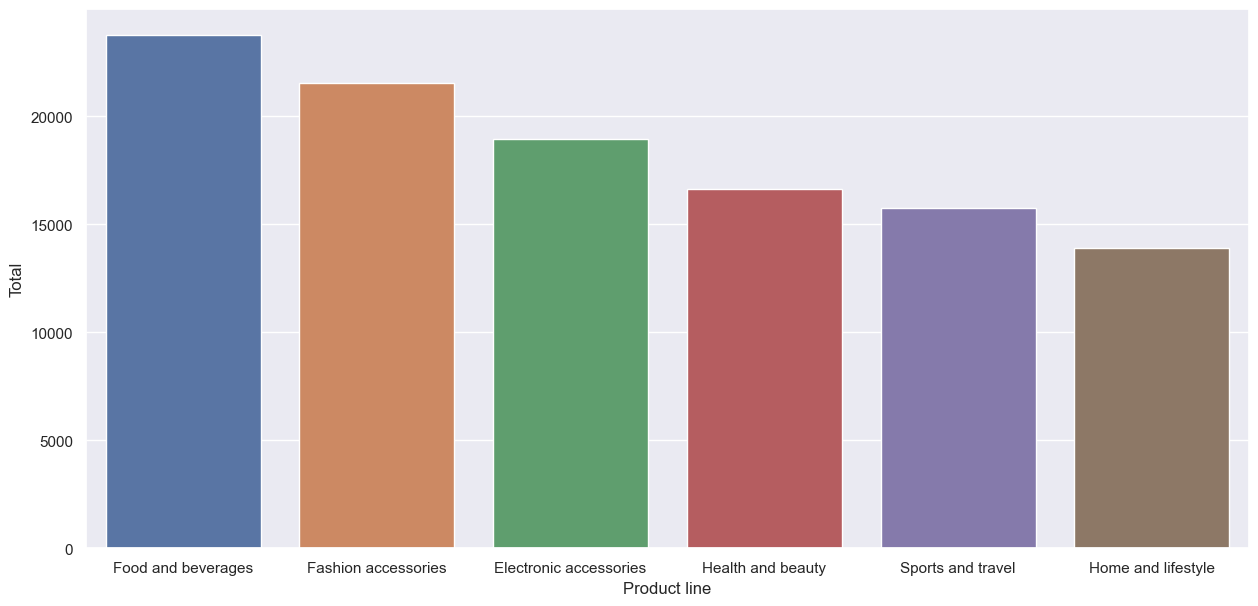

In [34]:
product_total2 =df_c.groupby(['Product line'],as_index =False)['Total'].sum().sort_values(by="Total",ascending =False)
sns.barplot(data=product_total2,x="Product line",y ="Total")
plt.show()

# Gender sales

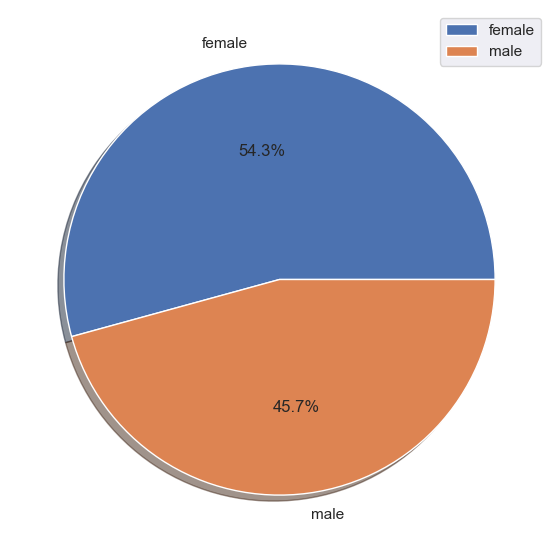

In [35]:
mylabels =["female","male"]
plt.pie(x=df_c['Gender'].value_counts(),labels=mylabels,shadow=True,autopct="%0.1f%%")
plt.legend()
plt.show()

# Payment Type

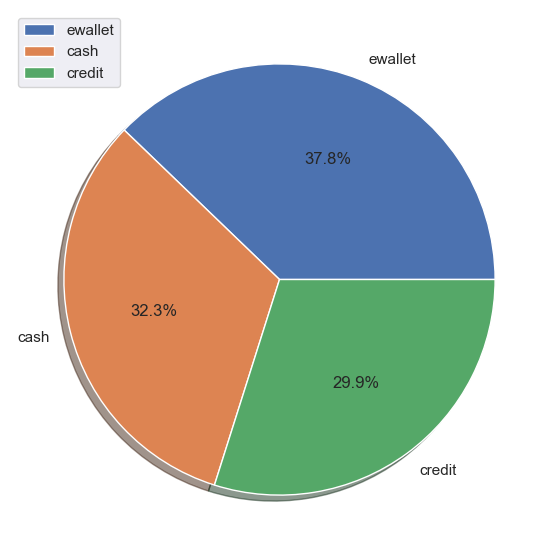

In [36]:
mylabels=['ewallet',"cash","credit"]
plt.pie(x=df_c['Payment'].value_counts(),shadow=True,autopct="%0.1f%%",labels=mylabels)
plt.legend()
plt.show()

# Customer Type

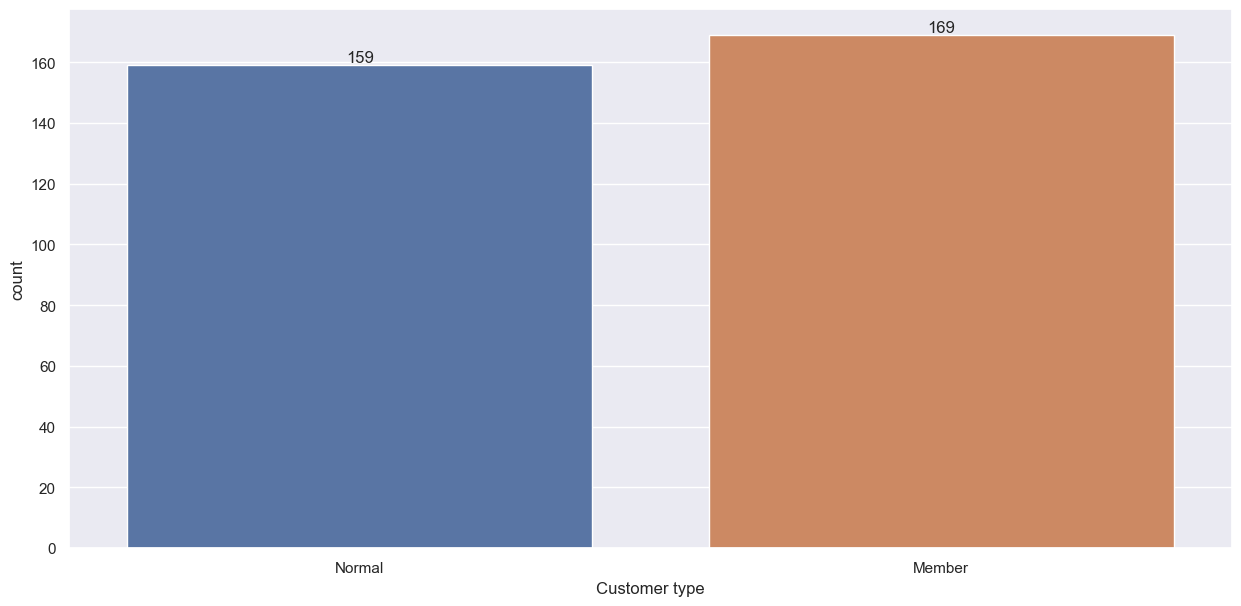

In [37]:
var2 = sns.countplot(data=df_c,x="Customer type")
sns.set(rc={"figure.figsize" :(10,5)})
for bar in var2.containers:
    var2.bar_label(bar)

# BOTH CUSTOMER (MEMBERS / NORMAL) FEMALES INTERESTED IN FOOD BEVERAGES AND FASHION ACCESSORIES USE ALL TYPE OF PAYMENT METHOD